In [1]:
import numpy as np
import pandas as pd
#% tensorflow_version 1.x
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics

print(tf.__version__)

#set random values
seed = 1
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

2.11.0


In [2]:
#MNIST: loading, splitting, and reshaping
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

#change labels of dataset for binary classification, 3 not three
binary_train_labels = np.zeros([len(training_labels)])
binary_test_labels = np.zeros([len(test_labels)])
for i in range(len(training_labels)):
    val = training_labels[i]
    if (val == 3):
        binary_train_labels[i] = 1
    else:
        binary_train_labels[i] = 0
for j in range(len(test_labels)):
    val = test_labels[j]
    if (val == 3):
        binary_test_labels[j] = 1
    else:
        binary_test_labels[j] = 0

In [3]:
#Convnet architecture definition

# *One convolution layer(32 filters of shape(3, 3) with ReLU)
# *One max - pooling layer(filter shape: (2, 2))
# *One fully connected layer(128 units; ReLU activation)
# *10 output units(softmax layer)


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    #change last layer to give soft max of three not three
    tf.keras.layers.Dense(2, activation='softmax'),
])

In [4]:
#Model training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, binary_train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0375 - accuracy: 0.9883
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0123 - accuracy: 0.9962
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0080 - accuracy: 0.9973
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0046 - accuracy: 0.9985
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0026 - accuracy: 0.9992


In [5]:
#Evaluation with test data
test_loss, test_acc = model.evaluate(test_images, binary_test_labels)
print(test_acc)
Predicted_percent = model.predict(test_images)
Predicted_labels = np.zeros(len(Predicted_percent))
#change the value of Predicted_Labels
for i in range(len(Predicted_percent)):
    if Predicted_percent[i,0] == np.max(Predicted_percent[i,:]):
        Predicted_labels[i] = 0
    else:
        Predicted_labels[i] = 1

print(Predicted_labels[:60])
print(Predicted_percent[18])

313/313 [==============================] - 1s 3ms/step - loss: 0.0069 - accuracy: 0.9977
0.9976999759674072
313/313 [==============================] - 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.20133987 0.7986601 ]


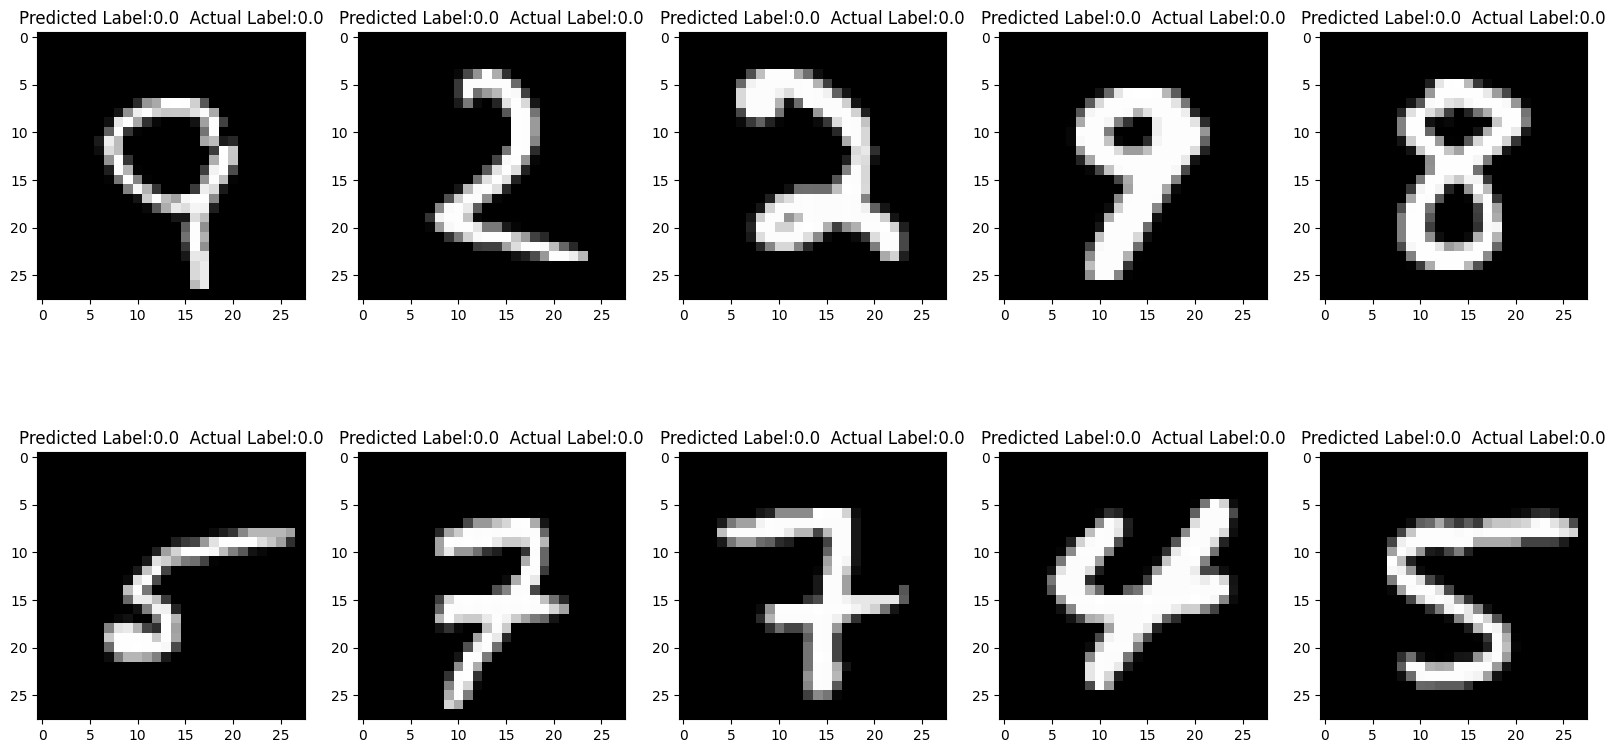

In [6]:
#Visualize 10 examples and labels random from the input information
entrynumber = np.random.randint(0,len(Predicted_percent),size=10)
plt.figure(figsize=(20,10))
for i in range(len(entrynumber)):
    entry = entrynumber[i]
    plt.subplot(2,5,i+1)
    plt.title(f"Predicted Label:{Predicted_labels[entry]}  Actual Label:{binary_test_labels[entry]}")
    plt.imshow(np.squeeze(test_images[entry]), cmap=plt.get_cmap('gray'))

In [7]:
#Report the Accuracy of the model: Accuracy, precision, recall, and F1
#Final model results
print("Final Accuracy Values:")

acc = (sklearn.metrics.accuracy_score(binary_test_labels,Predicted_labels))
precision = (sklearn.metrics.precision_score(binary_test_labels,Predicted_labels))
recall = (sklearn.metrics.recall_score(binary_test_labels,Predicted_labels))
f1 = (sklearn.metrics.f1_score(binary_test_labels,Predicted_labels))
print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("The original Network does quite well as is, I personally would be happy with these scores\nfor the sake of the problem asked I will go through a hyper parameter sweep testing other values")


Final Accuracy Values:
Accuracy: 0.9977
Precision: 0.9805258033106135
Recall: 0.997029702970297
F1 Score: 0.9887088856161022
The original Network does quite well as is, I personally would be happy with these scores
for the sake of the problem asked I will go through a hyper parameter sweep testing other values


Epoch 1/8
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0390 - accuracy: 0.9878
Epoch 2/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0138 - accuracy: 0.9959
Epoch 3/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0077 - accuracy: 0.9974
Epoch 4/8
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0050 - accuracy: 0.9983
Epoch 5/8
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0031 - accuracy: 0.9990
Epoch 6/8
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0025 - accuracy: 0.9992
Epoch 7/8
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 8/8
313/313 [==============================] - 2s 6ms/step - loss: 0.0067 - accuracy: 0.9979
0.9979000091552734
313/313 [==============================] - 2s 5ms/step
Results of the best preforming network
Hyperparameters were choosen due to high performance in the hyperpara

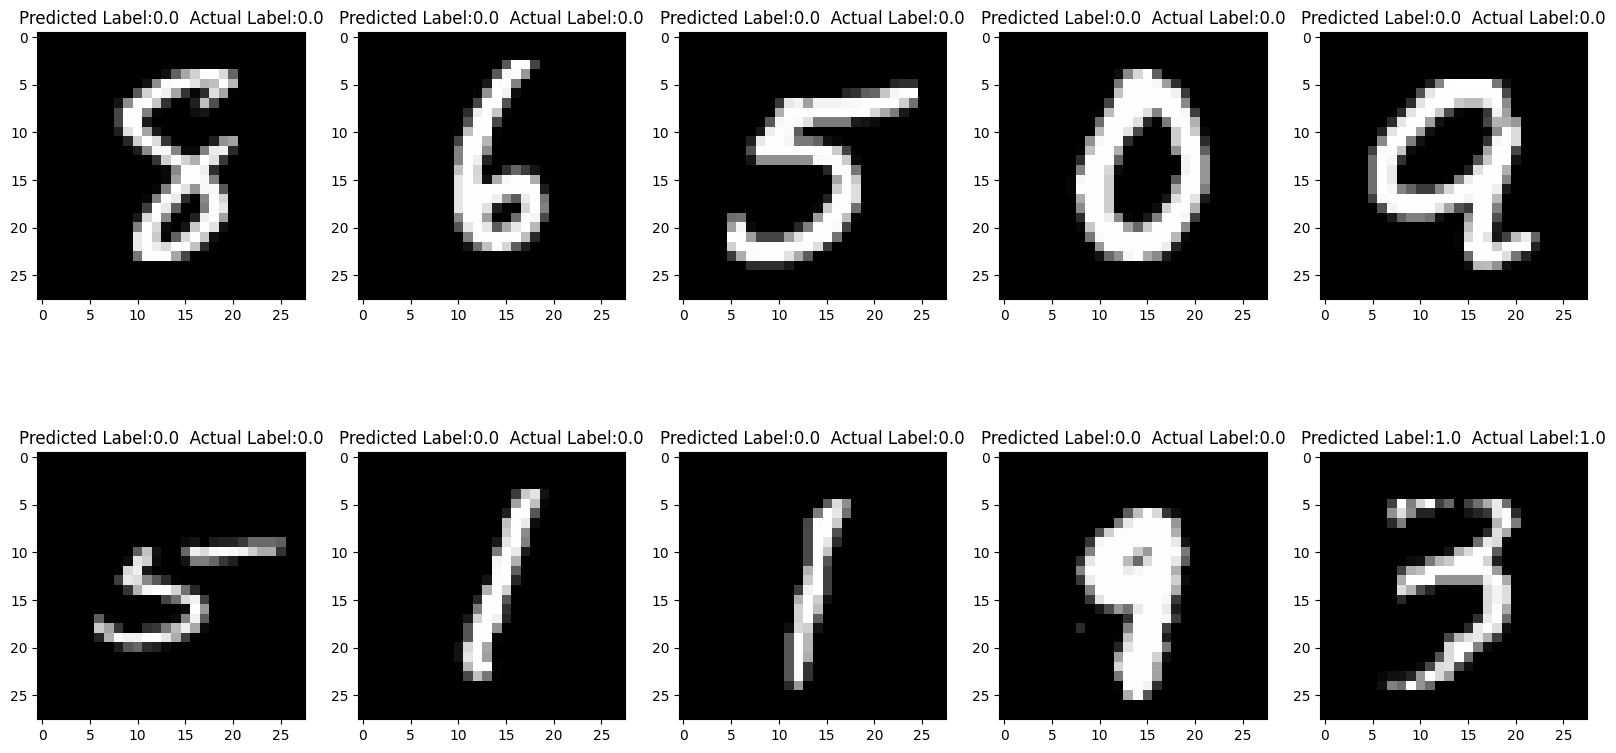

In [8]:
#Training the model with the best parameters for highest accuracy:

#From the hyperparameter results the best preforming network structure are

#Learning Rate: 0.001
#Beta 1 Value: 0.99
#Beta 2 Value: 0.99
#Epcoh Value: 8

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    #change last layer to give soft max of three not three
    tf.keras.layers.Dense(2, activation='softmax'),
    ])
#Model training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.99,beta_2=0.99), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, binary_train_labels, epochs=8)


#Evaluation with test data
test_loss, test_acc = model.evaluate(test_images, binary_test_labels)
print(test_acc)
Predicted_percent = model.predict(test_images)
Predicted_labels = np.zeros(len(Predicted_percent))
#change the value of Predicted_Labels
for i in range(len(Predicted_percent)):
    if Predicted_percent[i,0] == np.max(Predicted_percent[i,:]):
        Predicted_labels[i] = 0
    else:
        Predicted_labels[i] = 1

print("Results of the best preforming network")
print("Hyperparameters were choosen due to high performance in the hyperparameter sweep.\n I did not change the network structure due to the high performance, \n"
      "the network was performing at ACC: 0.998 and i did not believe tuning the network structure would give the additional 0.002 desired. \n This is why i choose to keep the network the same, but tune the hyperparameters to get bettter results. \n the network did see increase in the F1 score, recall and precision")

print(f"Final Accuracy Values: Best Performing Network")

acc = (sklearn.metrics.accuracy_score(binary_test_labels,Predicted_labels))
precision = (sklearn.metrics.precision_score(binary_test_labels,Predicted_labels))
recall = (sklearn.metrics.recall_score(binary_test_labels,Predicted_labels))
f1 = (sklearn.metrics.f1_score(binary_test_labels,Predicted_labels))
print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

#Visualize 10 examples and labels random from the input information
entrynumber = np.random.randint(0,len(Predicted_percent),size=10)
plt.figure(figsize=(20,10))
for i in range(len(entrynumber)):
    entry = entrynumber[i]
    plt.subplot(2,5,i+1)
    plt.title(f"Predicted Label:{Predicted_labels[entry]}  Actual Label:{binary_test_labels[entry]}")
    plt.imshow(np.squeeze(test_images[entry]), cmap=plt.get_cmap('gray'))

In [9]:
#going through a hyper parameter sweep: grid search method for Beta1, Beta2, and Learning Rate

Hyperparameter_sweep = False
#define function for all operations required dependent on hyperparameters
if Hyperparameter_sweep:
    learningrate = [0.01,0.001,0.0001]
    beta1 = [0.9,0.99,0.999]
    beta2 = [0.9,0.99]
    epochlist = [5,8,10]
    fulllist = pd.DataFrame([['details','acc','precision','recall','f1']])
    for i in range(len(learningrate)):
        alpha = learningrate[i]
        for j in range(len(beta1)):
            beta1val = beta1[j]
            for k in range(len(beta2)):
                beta2val = beta2[k]
                for q in range(len(epochlist)):
                    epochnum = epochlist[q]
                    #model set up
                    model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        #change last layer to give soft max of three not three
                        tf.keras.layers.Dense(2, activation='softmax'),
                    ])
                    #Model training
                    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=alpha,beta_1=beta1val,beta_2=beta2val), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                    model.fit(training_images, binary_train_labels, epochs=epochnum)


                    #Evaluation with test data
                    test_loss, test_acc = model.evaluate(test_images, binary_test_labels)
                    print(test_acc)
                    Predicted_percent = model.predict(test_images)
                    Predicted_labels = np.zeros(len(Predicted_percent))
                    #change the value of Predicted_Labels
                    for i in range(len(Predicted_percent)):
                        if Predicted_percent[i,0] == np.max(Predicted_percent[i,:]):
                            Predicted_labels[i] = 0
                        else:
                            Predicted_labels[i] = 1

                    print(f"Final Accuracy Values: LR:{alpha} B_1:{beta1val} B_2: {beta2val} Epoch: {epochnum}")

                    acc = (sklearn.metrics.accuracy_score(binary_test_labels,Predicted_labels))
                    precision = (sklearn.metrics.precision_score(binary_test_labels,Predicted_labels))
                    recall = (sklearn.metrics.recall_score(binary_test_labels,Predicted_labels))
                    f1 = (sklearn.metrics.f1_score(binary_test_labels,Predicted_labels))
                    print(f"Accuracy: {acc}")
                    print(f"Precision: {precision}")
                    print(f"Recall: {recall}")
                    print(f"F1 Score: {f1}")
                    details = f'LR:{alpha} B_1:{beta1val} B_2: {beta2val} Epoch: {epochnum}'
                    infolist = pd.DataFrame([[details,acc,precision,recall,f1]])
                    fulllist = fulllist.append(infolist)
                    print(fulllist)

In [10]:
#save the full list file as a CSV to get data out
if Hyperparameter_sweep:
    fulllist.to_csv("HyperParamter_Information_1.csv")
